In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fetal-health-classification/fetal_health.csv


# **Fetal Health Classification Using Machine Learning**
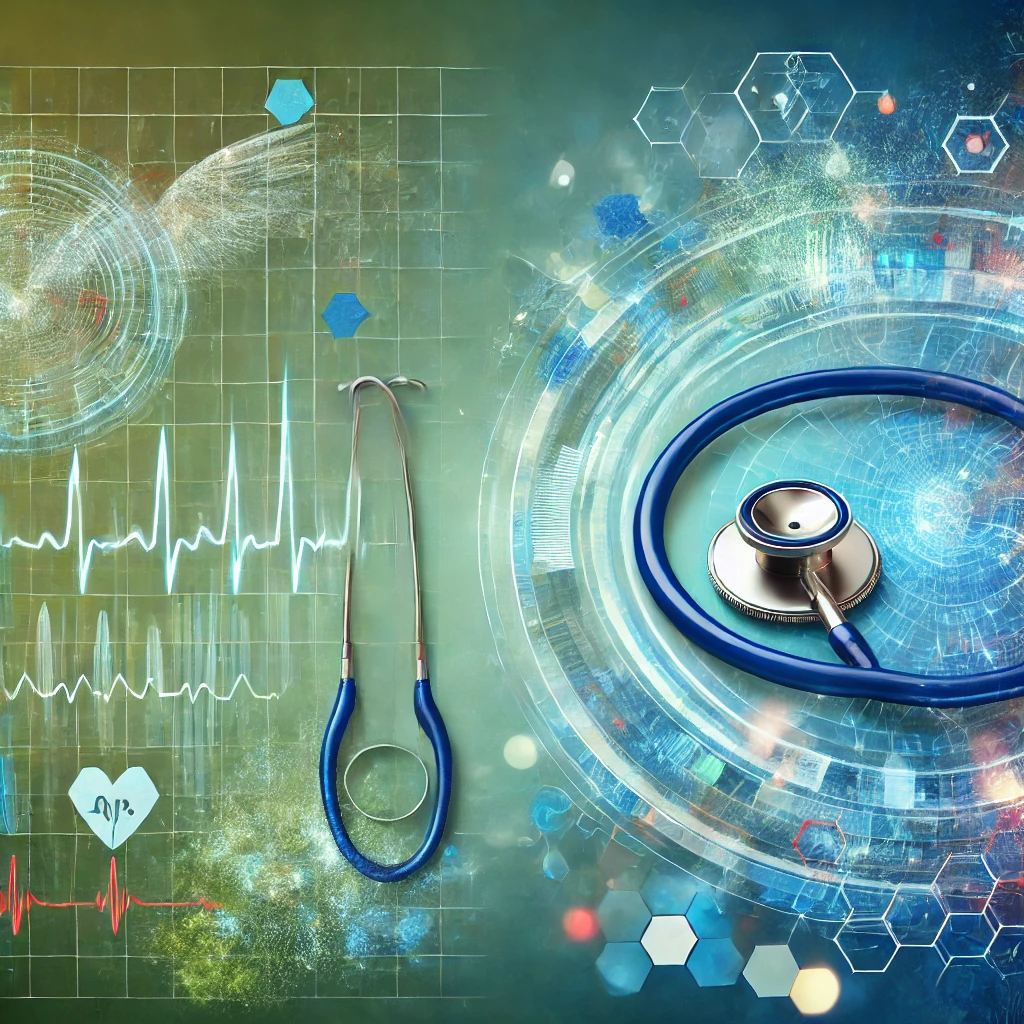
---

## **Overview**

This notebook demonstrates a complete machine learning pipeline to predict fetal health based on features derived from cardiotocogram (CTG) readings. The goal is to classify fetal health into three categories:
1. **Normal**
2. **Suspect**
3. **Pathological**

Early prediction of fetal health conditions can assist healthcare professionals in taking preventive measures, thus reducing risks to both the fetus and the mother.

---

## **Steps in the Notebook**

### 1. Dataset Loading and Exploration:
- Import necessary libraries.
- Load the dataset and explore its structure using summary statistics and visualizations.

### 2. Data Analysis and Visualization:
- Analyze the class distribution to understand the balance between classes.
- Explore feature relationships using pair plots and correlation heatmaps.
- Identify potential outliers and missing values.

### 3. Data Preprocessing:
- Handle missing or infinite values.
- Scale the features using `StandardScaler` for normalization.

### 4. Model Training and Evaluation:
- Train an initial Random Forest model as a baseline.
- Evaluate the baseline model using metrics such as confusion matrix, classification report, and ROC-AUC score.

### 5. Hyperparameter Tuning:
- Use `GridSearchCV` to find the optimal parameters for the Random Forest model.

### 6. Optimized Model Training:
- Train the Random Forest model using the best parameters obtained.
- Evaluate the optimized model and visualize results.

### 7. Feature Importance and Saving the Model:
- Analyze feature importance to understand the model’s decision-making process.
- Save the trained model for future use or deployment.

---

## **Key Objectives**
- **Classification Accuracy:** Achieve high performance in predicting fetal health classes.
- **Interpretability:** Identify the most important features influencing predictions.
- **Deployment Readiness:** Save the optimized model for real-world use.

---

This notebook provides a practical example of applying machine learning to solve healthcare-related problems, emphasizing data-driven decision-making to improve patient outcomes.

## 1. Importing Required Libraries and Loading the Dataset

In this section, we:
- Import the essential libraries required for data manipulation, visualization, and machine learning.
- Load the Fetal Health Classification dataset.
- Display the first few rows to understand the dataset structure.


In [2]:
# Importing essential libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for machine learning and model evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import (
    precision_score, recall_score, confusion_matrix, classification_report,
    accuracy_score, f1_score, roc_auc_score, roc_curve, auc
)

# Setting a random seed for reproducibility
np.random.seed(42)

# Loading the Fetal Health Classification dataset
data = pd.read_csv("../input/fetal-health-classification/fetal_health.csv")

# Displaying the first few rows of the dataset to understand its structure
print(data.head())


   baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0

## 2. General Information About the Dataset

This step provides a summary of the dataset, including:
- Number of rows and columns.
- Data types of each column.
- Non-null counts to identify missing values.

The `data.info()` function is used to display this information.

In [3]:
# Displaying general information about the dataset
# This includes:
# - Column names
# - Data types
# - Number of non-null values in each column
# - Memory usage of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

## 3. Statistical Summary of the Dataset

In this step, we generate a statistical summary of the dataset using the `describe()` method. This provides:
- Count, mean, and standard deviation of numerical features.
- Minimum and maximum values.
- The 25th, 50th (median), and 75th percentiles.

The `.T` (transpose) ensures the summary is displayed in a more readable format, with features as rows and statistics as columns.


In [4]:
# Generating a statistical summary of the dataset
# The summary includes count, mean, standard deviation, min, max, and percentiles
# Transposing (T) the result makes the summary more readable
data.describe().T


,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


## 4. Analyzing Class Distribution

In this step, we analyze the distribution of the target variable (`fetal_health`). This helps us understand:
- The balance between the three classes: Normal (1), Suspect (2), and Pathological (3).
- Whether the dataset is imbalanced, which can impact model training and evaluation.

The `value_counts()` method is used to count the number of occurrences of each class.


In [5]:
# Analyzing the distribution of the target variable 'fetal_health'
# This reveals how many instances belong to each class: Normal (1), Suspect (2), and Pathological (3)
print("Class Distribution:")
print(data['fetal_health'].value_counts())

Class Distribution:
fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64


## 5. Visualizing the Class Distribution

This step provides a visual representation of the class distribution using a count plot. The plot helps to:
- Clearly see the number of instances in each class (Normal, Suspect, Pathological).
- Highlight any imbalance in the dataset.

The `countplot()` function from Seaborn is used for visualization, with class labels (`fetal_health`) on the x-axis and the number of records on the y-axis.


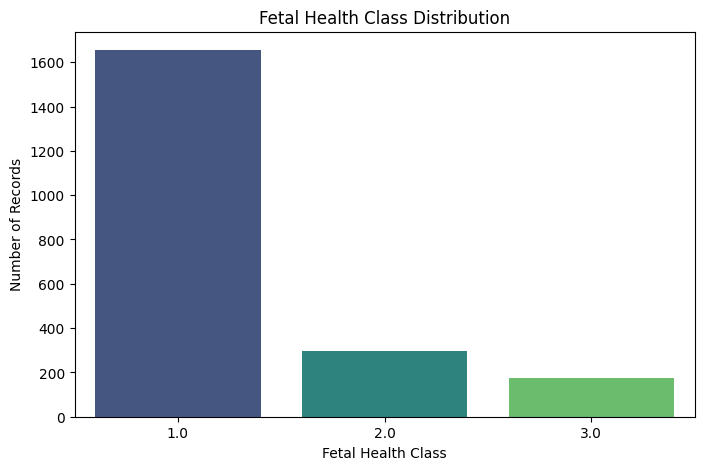

In [6]:
# Visualizing the distribution of the target variable 'fetal_health'
# This count plot shows the number of records in each class (1: Normal, 2: Suspect, 3: Pathological)

plt.figure(figsize=(8, 5))  # Set the figure size for better readability
sns.countplot(x='fetal_health', data=data, palette='viridis')  # Create a count plot with a color palette

# Adding plot titles and axis labels
plt.title('Fetal Health Class Distribution')  # Plot title
plt.xlabel('Fetal Health Class')  # X-axis label
plt.ylabel('Number of Records')  # Y-axis label

plt.show()  # Display the plot

## 6. Correlation Analysis

This section visualizes the correlation between the features in the dataset using a heatmap. It helps identify:
- Strongly correlated features that may affect model performance.
- Potential multicollinearity issues.


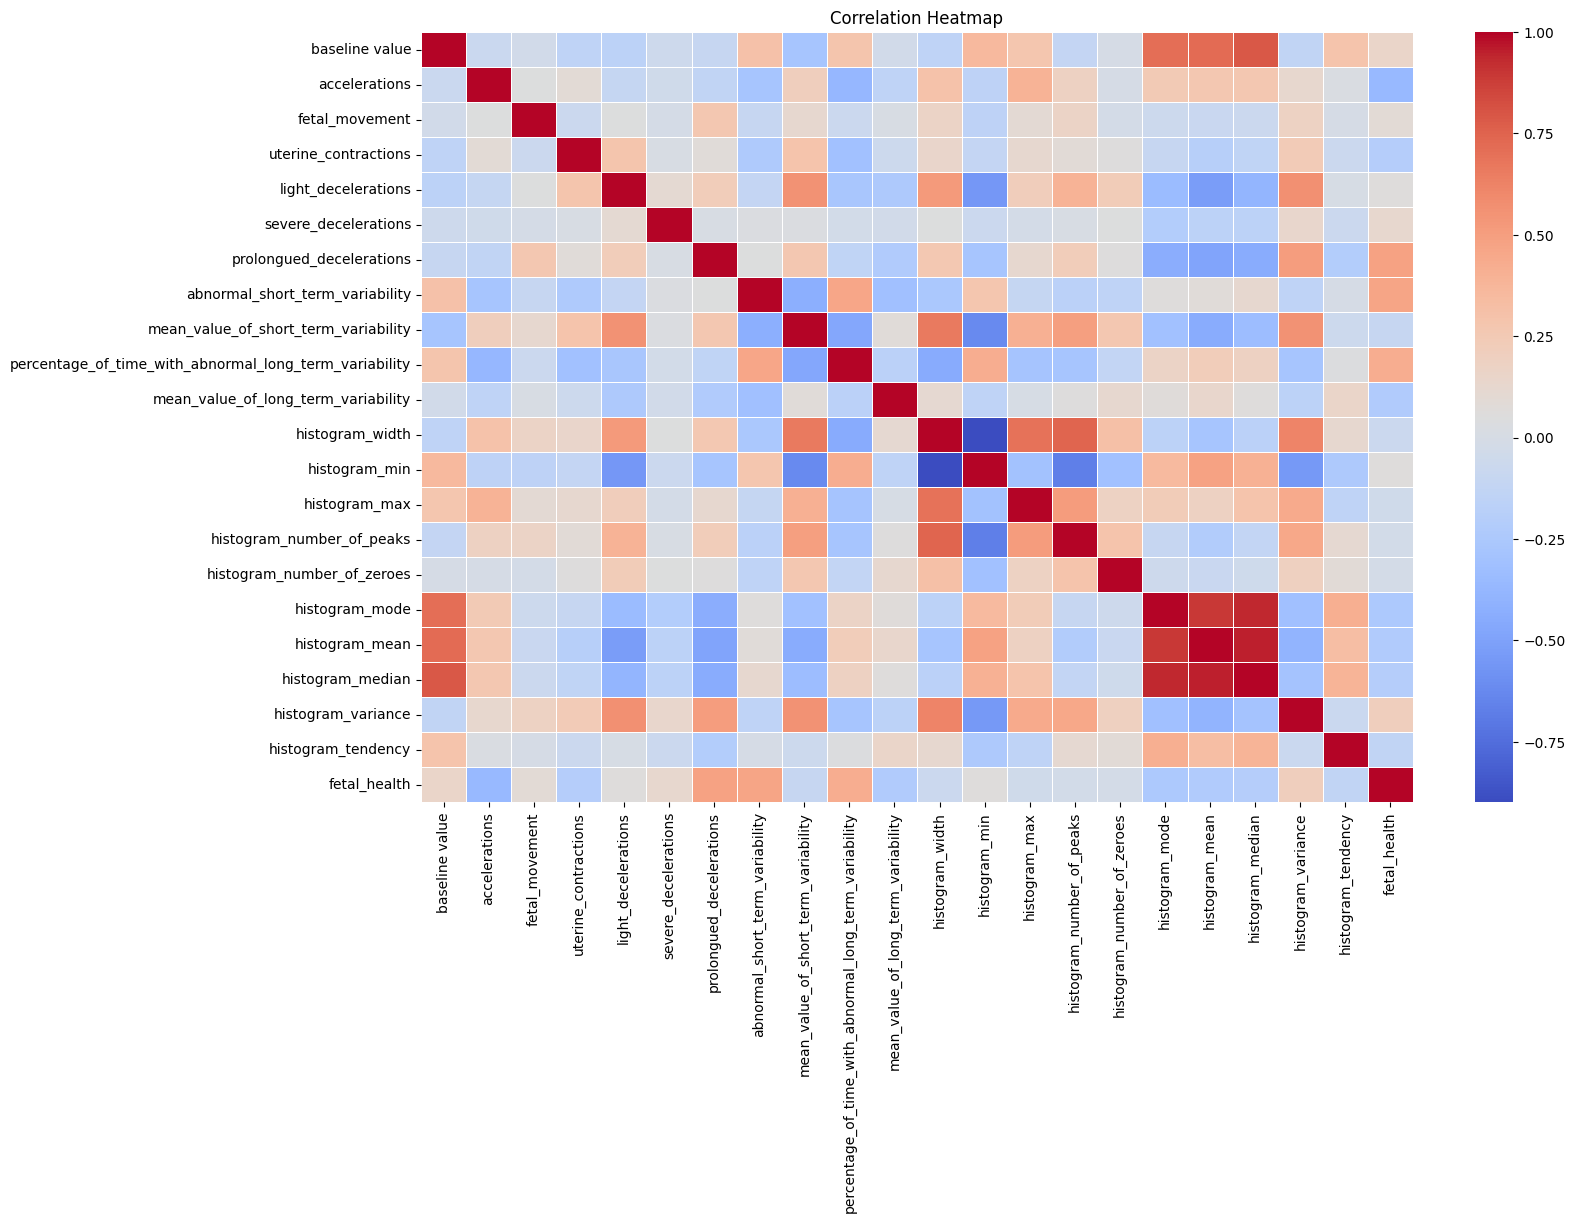

In [7]:
# Plotting the correlation heatmap to analyze feature relationships
plt.figure(figsize=(16, 10))  # Set the figure size
correlation_matrix = data.corr()  # Compute the correlation matrix
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)  # Create the heatmap
plt.title('Correlation Heatmap')  # Add a title
plt.show()  # Display the plot


## 7. Pairplot for Selected Features

This section uses a pairplot to visualize the relationships between selected features and the target variable (`fetal_health`). This helps explore:
- How features are distributed for different classes.
- Potential patterns or separability between classes.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

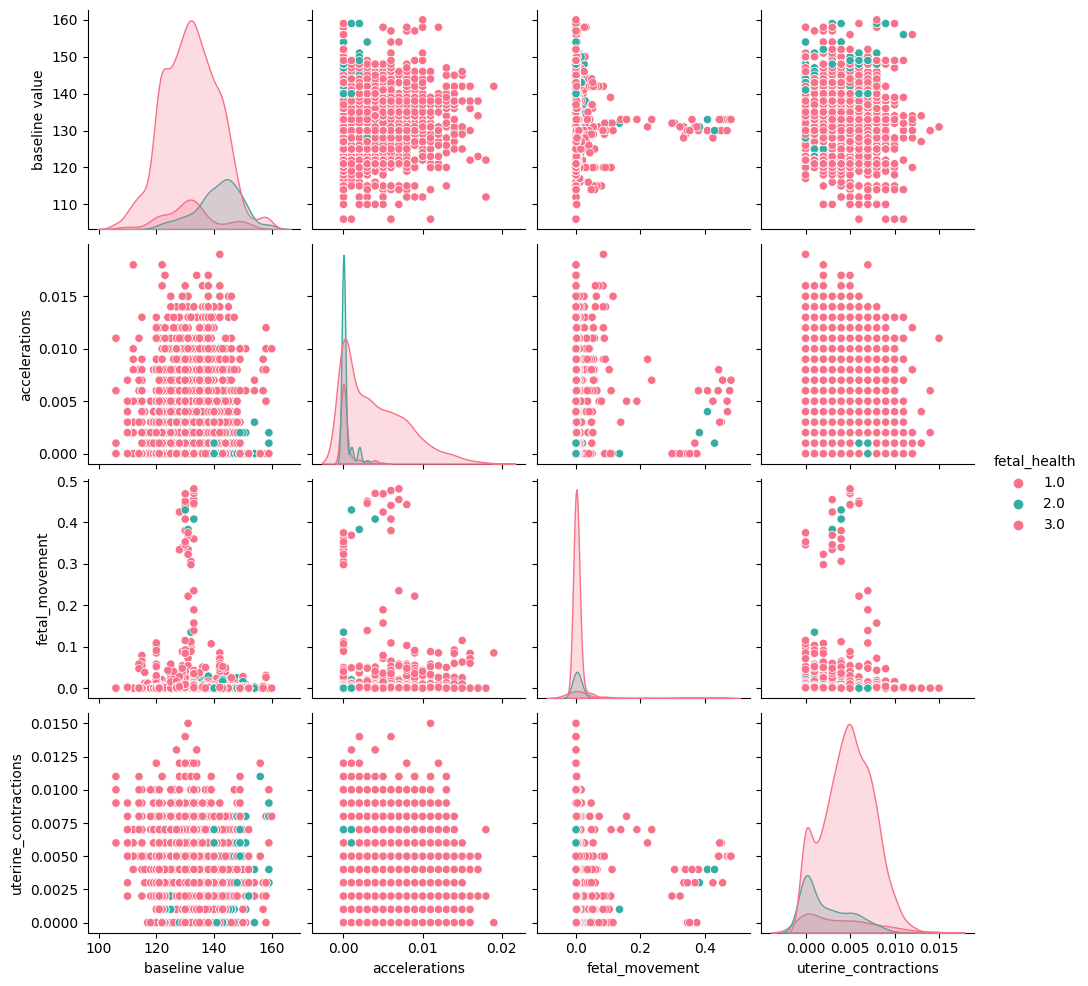

In [8]:
# Visualizing pairwise relationships among selected features
selected_features = ['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'fetal_health']
sns.pairplot(data[selected_features], hue='fetal_health', palette='husl')  # Create a pairplot with class coloring
plt.show()  # Display the plot


## 8. Checking for Outliers using Boxplots

Boxplots are used to identify potential outliers in each feature. Outliers may affect model performance and require special handling.


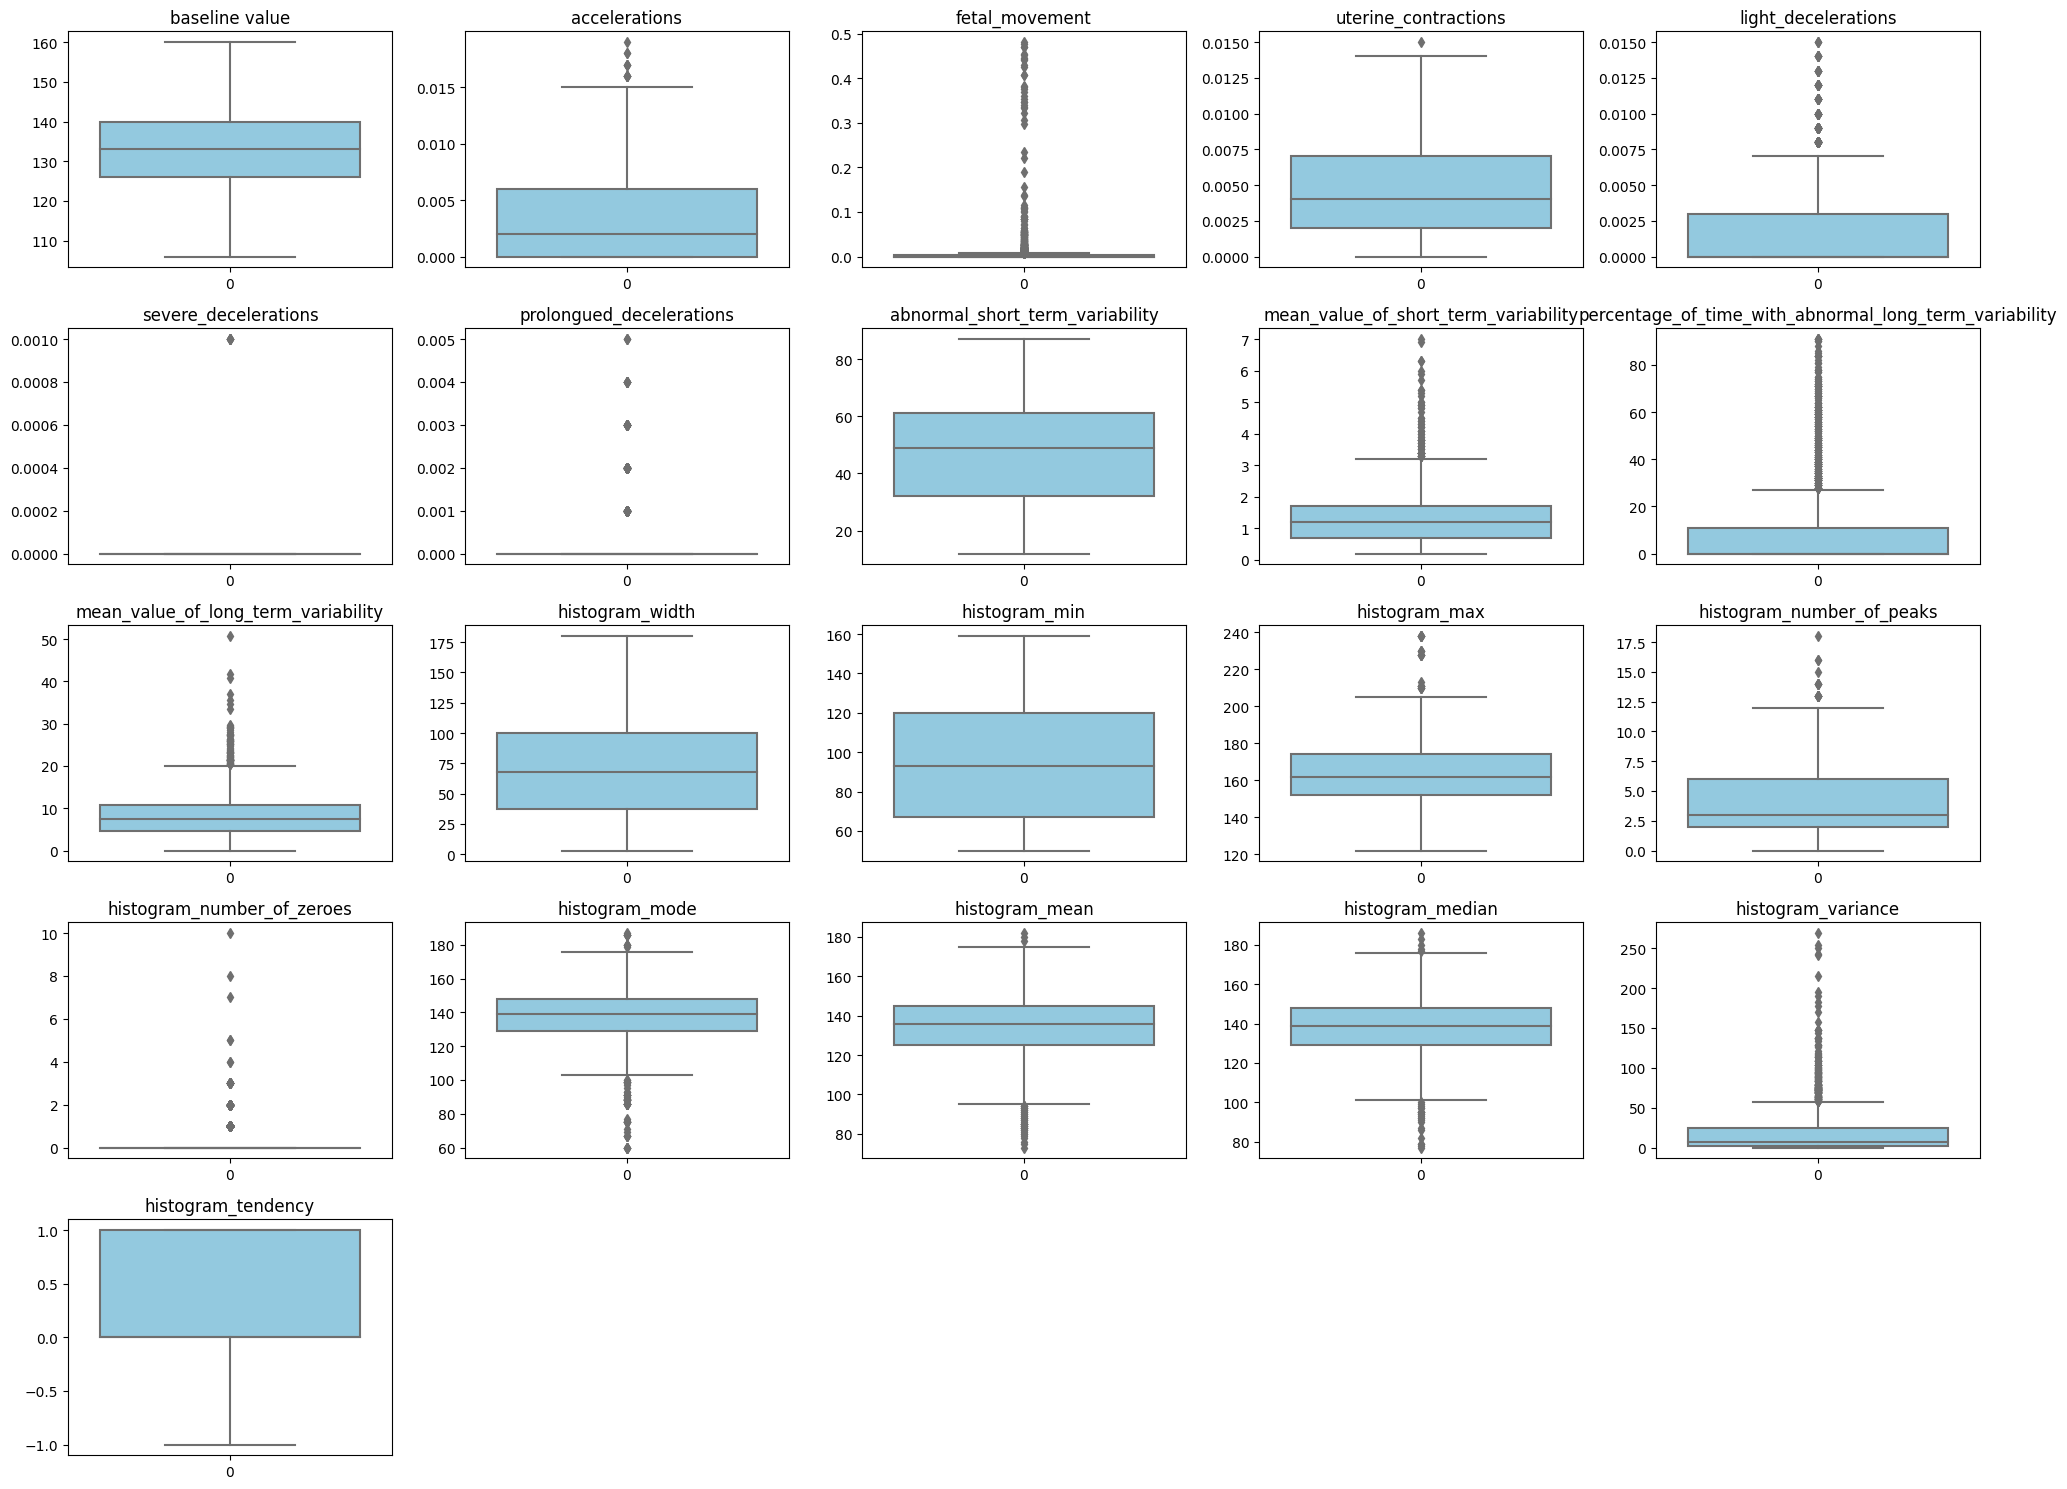

In [9]:
# Plotting boxplots for each feature to identify potential outliers
plt.figure(figsize=(20, 15))  # Set the figure size
for index, column in enumerate(data.columns[:-1], 1):  # Exclude the target column
    plt.subplot(5, 5, index)
    sns.boxplot(data[column], color='skyblue')  # Create a boxplot for each feature
    plt.title(column)  # Add feature name as the title
plt.tight_layout()  # Adjust layout for better readability
plt.show()  # Display the plots

## 9. Checking for Missing Values

This section checks for missing values in the dataset to ensure completeness and consistency.


In [10]:
# Checking for missing values in the dataset
missing_values = data.isnull().sum()  # Count missing values in each column
print("\nMissing Values:")
print(missing_values)


Missing Values:
baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode         

## 10. Statistical Summary for Each Class

Here, we compute the mean of each feature grouped by the target variable (`fetal_health`). This helps identify key differences between the classes.


In [11]:
# Calculating the mean of each feature for each class
grouped_data = data.groupby('fetal_health').mean()
print("\nStatistical Summary for Each Class:")
print(grouped_data.T)  # Transpose for better readability


Statistical Summary for Each Class:
fetal_health                                                 1.0         2.0  \
baseline value                                      1.319819e+02  141.684746   
accelerations                                       3.992145e-03    0.000275   
fetal_movement                                      7.963142e-03    0.008332   
uterine_contractions                                4.780665e-03    0.002390   
light_decelerations                                 1.941390e-03    0.000536   
severe_decelerations                                6.042296e-07    0.000000   
prolongued_decelerations                            5.135952e-05    0.000095   
abnormal_short_term_variability                     4.246586e+01   61.901695   
mean_value_of_short_term_variability                1.430634e+00    0.638983   
percentage_of_time_with_abnormal_long_term_vari...  5.044713e+00   29.030508   
mean_value_of_long_term_variability                 8.705498e+00    8.026102   
his

## 11. Distribution of Selected Features

This section plots the distribution of selected features across the three classes. It helps visualize how well the features separate the classes.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

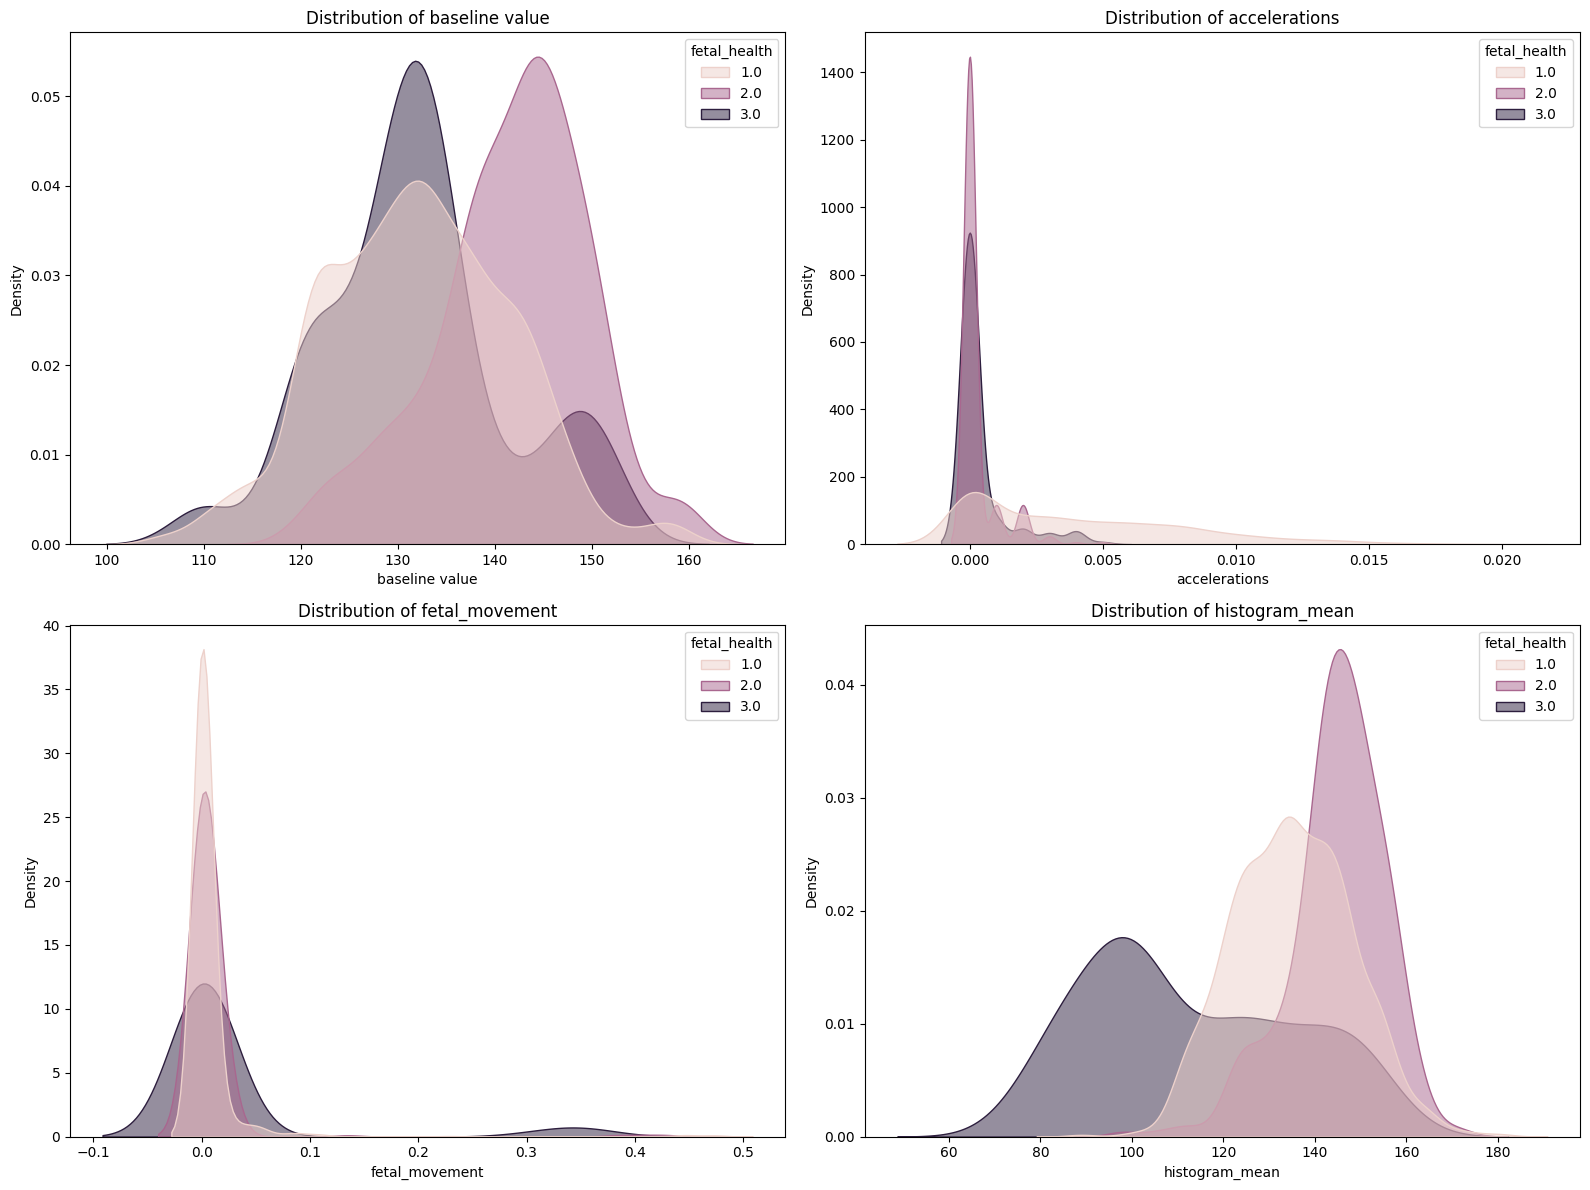

In [12]:
# Handle infinite values and missing data
data.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinite values with NaN
data.dropna(inplace=True)  # Drop rows with NaN

# Plotting distributions for selected features
features_to_plot = ['baseline value', 'accelerations', 'fetal_movement', 'histogram_mean']
plt.figure(figsize=(16, 12))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(
        data=data, 
        x=feature, 
        hue="fetal_health", 
        fill=True, 
        common_norm=False, 
        alpha=0.5
    )
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

## 12. Scaling Features

Standard scaling is applied to normalize feature values, improving the performance of machine learning models.

In [13]:
# Scaling features for normalization
scaler = StandardScaler()
X = data.drop('fetal_health', axis=1)  # Features
y = data['fetal_health']  # Target variable
X_scaled = scaler.fit_transform(X)  # Apply standard scaling

## 13. Splitting the Dataset

The dataset is split into training and testing sets using an 80%-20% ratio. This ensures the model is evaluated on unseen data during testing.

In [14]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 14. Training the Initial Random Forest Model

A baseline Random Forest model is trained to evaluate its performance without hyperparameter tuning.

In [15]:
# Training the initial Random Forest model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)  # Initialize Random Forest model
model.fit(X_train, y_train)  # Train the model on the training set
y_pred = model.predict(X_test)  # Predict on the test set

## 15. Evaluating the Baseline Model

The baseline Random Forest model is evaluated using metrics such as:
- Confusion Matrix
- Classification Report
- ROC-AUC Score

In [16]:
# Evaluating the baseline model's performance
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))  # Confusion matrix

print("\nClassification Report:")
print(classification_report(y_test, y_pred))  # Classification report

# Compute ROC-AUC score for multi-class classification
roc_score = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
print(f"ROC-AUC Score: {roc_score}")

Confusion Matrix:
[[326   6   1]
 [ 13  50   1]
 [  1   1  27]]

Classification Report:
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       333
         2.0       0.88      0.78      0.83        64
         3.0       0.93      0.93      0.93        29

    accuracy                           0.95       426
   macro avg       0.92      0.90      0.91       426
weighted avg       0.94      0.95      0.94       426

ROC-AUC Score: 0.9855745685829805


## 16. Hyperparameter Tuning with GridSearchCV

Hyperparameter tuning is performed on the Random Forest model to find the best combination of parameters for improved performance. GridSearchCV is used to:
- Explore multiple combinations of `n_estimators` and `max_depth`.
- Evaluate each combination using 5-fold cross-validation.

In [17]:
# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)  # Display the best parameters

Best Parameters: {'max_depth': None, 'n_estimators': 200}


## 17. Training the Optimized Random Forest Model

The Random Forest model is retrained using the best hyperparameters obtained from GridSearchCV.

In [18]:
# Train the optimized Random Forest model
optimized_rf = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42)
optimized_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

## 18. Predictions with Optimized Model

Predictions are made on the test set using the optimized Random Forest model.

In [19]:
# Making predictions with the optimized model
y_pred = optimized_rf.predict(X_test)
y_pred_proba = optimized_rf.predict_proba(X_test)  # Probabilities for ROC-AUC calculation

## 19. Evaluating the Optimized Model

The optimized model's performance is evaluated using metrics:
- Confusion Matrix
- Classification Report
- ROC-AUC Score

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))  # Confusion matrix

print("\nClassification Report:")
print(classification_report(y_test, y_pred))  # Classification report

# Compute ROC-AUC score for multi-class classification
roc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print(f"ROC-AUC Score: {roc_score}")

Confusion Matrix:
[[327   5   1]
 [ 11  52   1]
 [  1   1  27]]

Classification Report:
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       333
         2.0       0.90      0.81      0.85        64
         3.0       0.93      0.93      0.93        29

    accuracy                           0.95       426
   macro avg       0.93      0.91      0.92       426
weighted avg       0.95      0.95      0.95       426

ROC-AUC Score: 0.9867802486938887


## 20. Visualizing the Confusion Matrix

A heatmap is used to visualize the confusion matrix, making it easier to interpret the model's predictions.

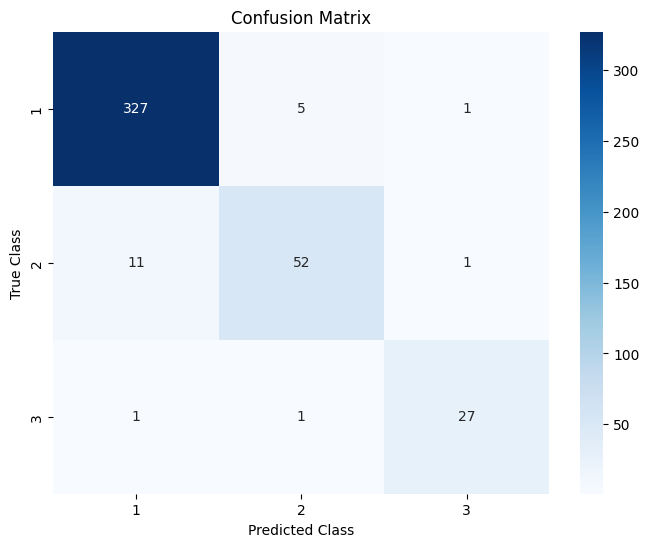

In [21]:
# Plotting the confusion matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

## 21. Feature Importance

Feature importance is visualized to understand which features contributed the most to the Random Forest model's decisions.

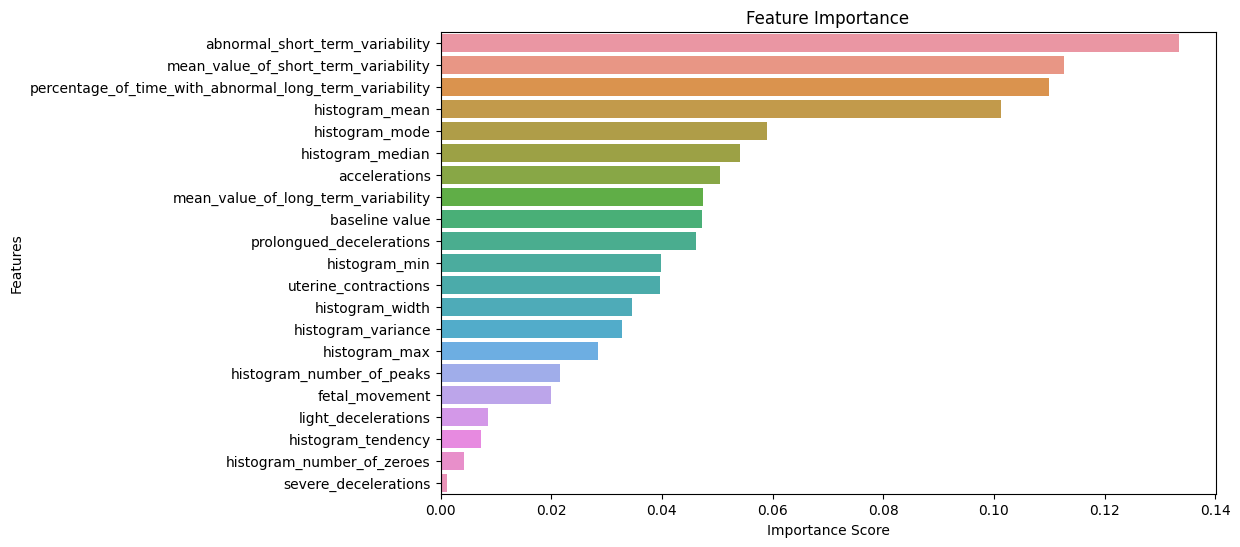

In [22]:
# Visualizing feature importance
feature_importances = pd.Series(optimized_rf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

## 22. Saving the Model

The optimized Random Forest model is saved to a file for future use or deployment.

In [23]:
# Save the optimized model using joblib
import joblib
joblib.dump(optimized_rf, 'optimized_fetal_health_model.pkl')

['optimized_fetal_health_model.pkl']